In [501]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
plt.style.use('ggplot')

In [3]:
tennis_2019 = pd.read_csv('tennis_atp/atp_matches_2019.csv', delimiter=',')
tennis_2018 = pd.read_csv('tennis_atp/atp_matches_2018.csv', delimiter=',')
tennis_2017 = pd.read_csv('tennis_atp/atp_matches_2017.csv', delimiter=',')
tennis_2016 = pd.read_csv('tennis_atp/atp_matches_2016.csv', delimiter=',')
tennis_2015 = pd.read_csv('tennis_atp/atp_matches_2015.csv', delimiter=',')
tennis_2014 = pd.read_csv('tennis_atp/atp_matches_2014.csv', delimiter=',')
tennis_2013 = pd.read_csv('tennis_atp/atp_matches_2013.csv', delimiter=',')
tennis_2012 = pd.read_csv('tennis_atp/atp_matches_2012.csv', delimiter=',')
tennis_2011 = pd.read_csv('tennis_atp/atp_matches_2011.csv', delimiter=',')
tennis_2010 = pd.read_csv('tennis_atp/atp_matches_2010.csv', delimiter=',')

In [4]:
copy_tennis_2019 = tennis_2019.copy()
copy_tennis_2018 = tennis_2018.copy()
copy_tennis_2017 = tennis_2017.copy()
copy_tennis_2016 = tennis_2016.copy()
copy_tennis_2015 = tennis_2015.copy()
copy_tennis_2014 = tennis_2014.copy()
copy_tennis_2013 = tennis_2013.copy()
copy_tennis_2012 = tennis_2012.copy()
copy_tennis_2011 = tennis_2011.copy()
copy_tennis_2010 = tennis_2010.copy()

In [6]:
final_tennis = pd.concat([copy_tennis_2019, copy_tennis_2018, copy_tennis_2017, copy_tennis_2016, copy_tennis_2015, copy_tennis_2014, copy_tennis_2013, copy_tennis_2012, copy_tennis_2011, copy_tennis_2010], axis = 0, join='inner').sort_index()
copy_tennis = final_tennis.copy()

In [7]:
copy_tennis.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

# Creating New Df

In [8]:
wins_tennis = copy_tennis.drop(['loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age', 
                                        'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'loser_rank', 
                                'loser_rank_points'], axis=1).copy()

In [9]:
wins_tennis['win'] = 1

In [10]:
wins_tennis.shape

(29340, 31)

In [11]:
wins_tennis.columns = ['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'score', 'best_of', 'round', 'minutes', 'w_ace', 'w_df', 'w_svpt',
       'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced',
       'winner_rank', 'winner_rank_points', 'win']

wins_tennis.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'score', 'best_of', 'round', 'minutes', 'w_ace', 'w_df', 'w_svpt',
       'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced',
       'winner_rank', 'winner_rank_points', 'win'],
      dtype='object')

In [12]:
loss_tennis = copy_tennis.drop(['winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'winner_rank', 'winner_rank_points'], axis=1).copy()

In [13]:
loss_tennis['win'] = 0

In [14]:
loss_tennis.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'loser_id', 'loser_seed', 'loser_entry',
       'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age',
       'score', 'best_of', 'round', 'minutes', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'loser_rank', 'loser_rank_points', 'win'],
      dtype='object')

In [15]:
loss_tennis.shape

(29340, 31)

In [16]:
wins_tennis.columns = [i.replace('w_', '').replace('winner_', '') for i in wins_tennis.columns]
wins_tennis.columns

Index(['tourney_id', 'tourney_name', 'surface', 'drasize', 'tourney_level',
       'tourney_date', 'match_num', 'id', 'seed', 'entry', 'name', 'hand',
       'ht', 'ioc', 'age', 'score', 'best_of', 'round', 'minutes', 'ace', 'df',
       'svpt', '1stIn', '1stWon', '2ndWon', 'SvGms', 'bpSaved', 'bpFaced',
       'rank', 'rank_points', 'win'],
      dtype='object')

In [17]:
loss_tennis.columns = [i.replace('w_', '').replace('winner_', '') for i in wins_tennis.columns]
loss_tennis.columns

Index(['tourney_id', 'tourney_name', 'surface', 'drasize', 'tourney_level',
       'tourney_date', 'match_num', 'id', 'seed', 'entry', 'name', 'hand',
       'ht', 'ioc', 'age', 'score', 'best_of', 'round', 'minutes', 'ace', 'df',
       'svpt', '1stIn', '1stWon', '2ndWon', 'SvGms', 'bpSaved', 'bpFaced',
       'rank', 'rank_points', 'win'],
      dtype='object')

In [18]:
con_tennis = pd.concat([wins_tennis, loss_tennis])
con_tennis.groupby(['name']).mean()['ace']

name
Abd Hazli Bin Zainuddin         NaN
Abdulhameed Alshatti            NaN
Abdulhamid Mubarak         0.000000
Abdulla Hajji              0.000000
Abdullah Maqdas            2.500000
                             ...   
Zdenek Kolar               2.000000
Ze Zhang                   4.513514
Zhe Li                     3.642857
Zhizhen Zhang              6.833333
Zsombor Piros              6.000000
Name: ace, Length: 1271, dtype: float64

### Replace NaN with 0 in con_tennis

In [150]:
con_tennis['ace'] = con_tennis['ace'].fillna(0)
con_tennis['svpt'] = con_tennis['svpt'].fillna(0)
con_tennis['1stIn'] = con_tennis['1stIn'].fillna(0)
con_tennis['bpSaved'] = con_tennis['bpSaved'].fillna(0)
con_tennis['bpFaced'] = con_tennis['bpFaced'].fillna(0)
con_tennis['df'] = con_tennis['df'].fillna(0)

In [151]:
avg_age = con_tennis.groupby(['name']).mean()['age']
avg_age

name
Abd Hazli Bin Zainuddin    29.664613
Abdulhameed Alshatti       18.585900
Abdulhamid Mubarak         21.894593
Abdulla Hajji              19.082820
Abdullah Maqdas            27.695414
                             ...    
Zdenek Kolar               21.765914
Ze Zhang                   24.062971
Zhe Li                     30.327817
Zhizhen Zhang              21.587532
Zsombor Piros              18.787680
Name: age, Length: 1271, dtype: float64

## Country Winning Percentages

In [149]:
#con_tennis[((con_tennis['ioc']=="RSA") & (con_tennis['name'] == "Kevin Anderson"))]

In [170]:
# country_win_perc = con_tennis.groupby(['ioc']).mean()['win'].sort_values(ascending=False)
# country_win_perc
# country_win_sum = con_tennis.groupby(['ioc']).sum()['win'].sort_values(ascending=False)
# country_win_sum
# country_player_total = con_tennis.groupby(['ioc'])['name'].nunique().sort_values(ascending=False)
# country_player_total

ioc
USA    80
FRA    66
ESP    50
GER    49
ITA    40
       ..
GUM     1
SAM     1
SOL     1
UAE     1
ALG     1
Name: name, Length: 98, dtype: int64

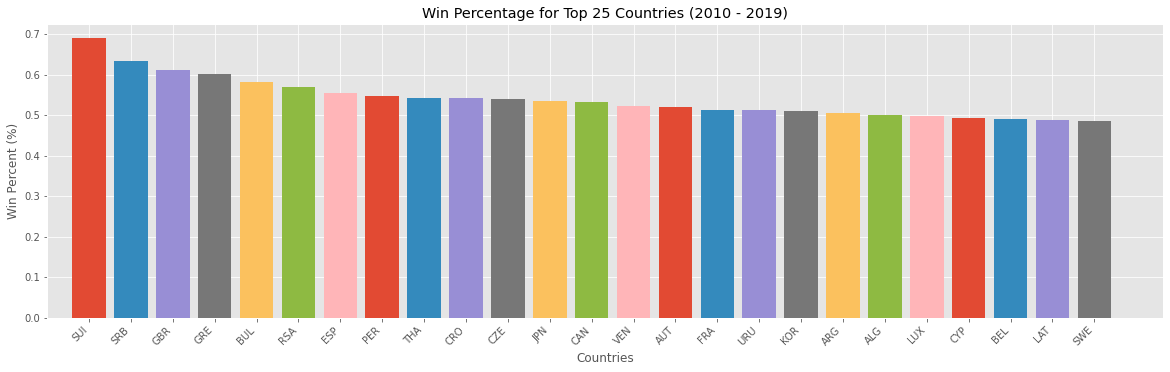

In [482]:
country_win_perc = con_tennis.groupby(['ioc']).mean()['win'].sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(20, 6))

for country, win_per in country_win_perc[2:27].items():
    ax.bar(country, win_per)

ax.set_xlabel('Countries')
ax.set_ylabel('Win Percent (%)')
ax.set_title('Win Percentage for Top 25 Countries (2010 - 2019)')
ax.set_xlim(xmin=-1)
fig.autofmt_xdate(rotation=45)

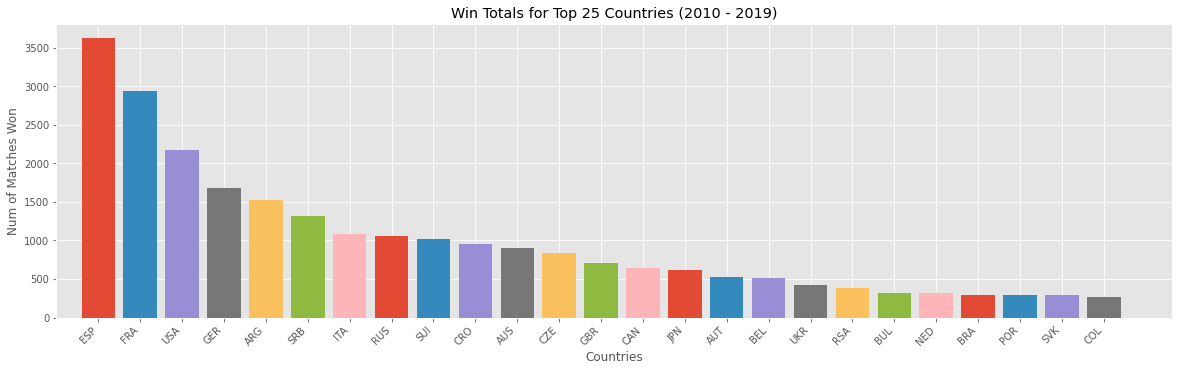

In [383]:
country_win_sum = con_tennis.groupby(['ioc']).sum()['win'].sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(20, 6))

for country, wins in country_win_sum[:25].items():
    ax.bar(country, wins)

ax.set_xlabel('Countries')
ax.set_ylabel('Num of Matches Won')
ax.set_title('Win Totals for Top 25 Countries (2010 - 2019)')
ax.set_xlim(xmin=-1)
fig.autofmt_xdate(rotation=45)

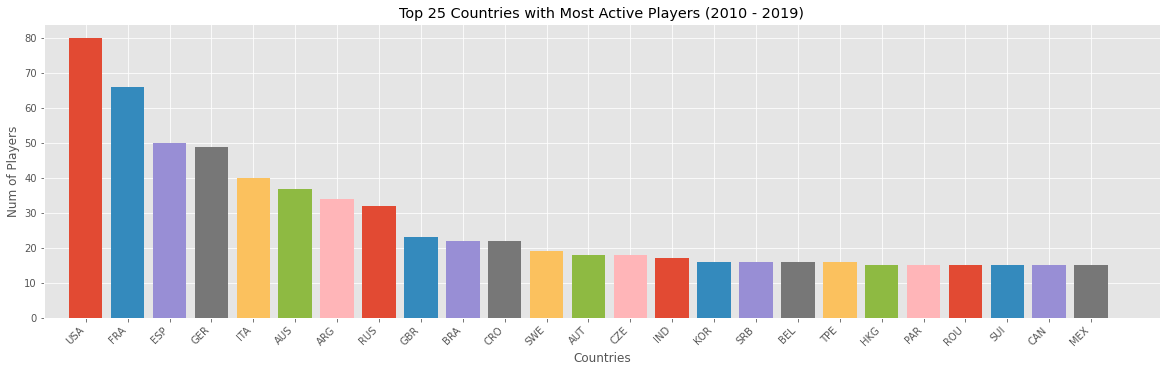

In [450]:
country_player_total = con_tennis.groupby(['ioc'])['name'].nunique().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(20, 6))

for country, player_count in country_player_total[:25].items():
    ax.bar(country, player_count)

ax.set_xlabel('Countries')
ax.set_ylabel('Num of Players')
ax.set_title('Top 25 Countries with Most Active Players (2010 - 2019)')
ax.set_xlim(xmin=-1)
fig.autofmt_xdate(rotation=45)

## Metrics to Measure By

In [451]:
# fig, ax = plt.subplots(figsize=(12, 4))
# ax.hist(con_tennis.groupby(['name']).mean()['ace'], bins=30);
# ax.set_xlabel('Avg Num of Aces')
# ax.set_ylabel('Frequency')
# ax.set_title('Frequency of Avg Num of Aces Per Match (2010 - 2019)')

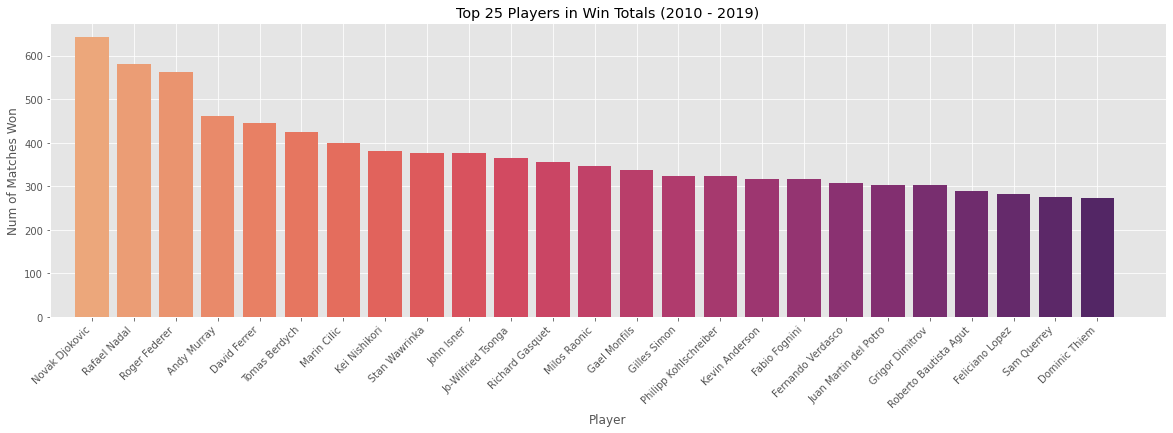

In [522]:
player_win_sum = con_tennis.groupby(['name']).sum()['win'].sort_values(ascending=False)
flare = sns.color_palette("flare", 1500) #as_cmap=True)
fig, ax = plt.subplots(figsize=(20, 6))

for player, wins in player_win_sum[:25].items():
    ax.bar(player, wins, color=sns.set_palette("flare", 25, 0.4))
ax.set_xlabel('Player')
ax.set_ylabel('Num of Matches Won')
ax.set_title('Top 25 Players in Win Totals (2010 - 2019)')
ax.set_xlim(xmin=-1)

fig.autofmt_xdate(rotation=45)

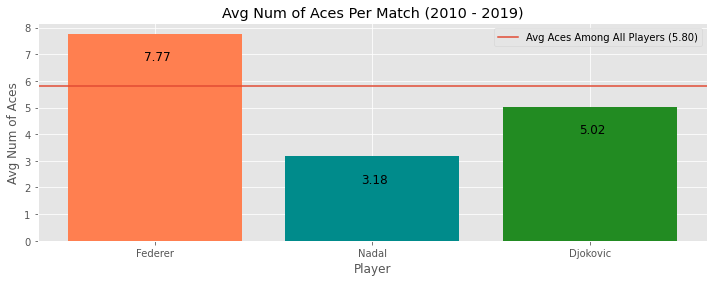

In [498]:
fig, ax = plt.subplots(figsize=(12, 4))
avg_ace = con_tennis['ace'].mean()
x = ['Federer', 'Nadal', 'Djokovic']
y = [con_tennis.groupby(['name']).mean()['ace']['Roger Federer'].round(2), con_tennis.groupby(['name']).mean()['ace']['Rafael Nadal'].round(2), con_tennis.groupby(['name']).mean()['ace']['Novak Djokovic'].round(2)]

ax.bar(x, y, color=['coral', 'darkcyan', 'forestgreen'])
ax.axhline(avg_ace, label=f"Avg Aces Among All Players ({avg_ace:.2f})")
ax.set_xlabel('Player')
ax.set_ylabel('Avg Num of Aces')
ax.set_title('Avg Num of Aces Per Match (2010 - 2019)')
ax.legend()


for index, value in enumerate(y):
    ax.text(index - 0.05, value - 1, str(value), c='black', fontsize=12)

In [452]:
# top_10_aces = con_tennis.groupby('name')['ace'].sum().sort_values(ascending=False).head(10)
# top_10_aces_name = top_10_aces.index

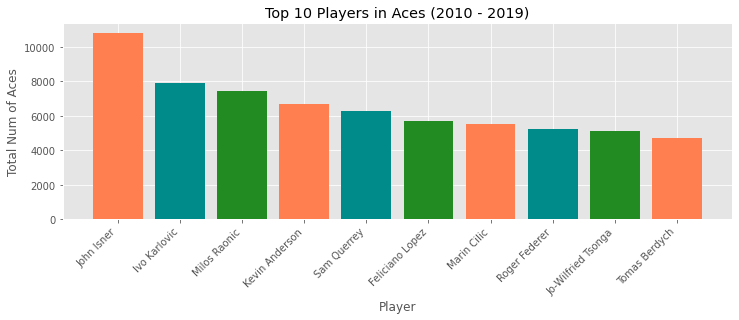

In [468]:
top_10_aces = con_tennis.groupby('name')['ace'].sum().sort_values(ascending=False).head(10)
top_10_aces_name = top_10_aces.index

fig, ax = plt.subplots(figsize=(12, 4))
x = top_10_aces_name
y = top_10_aces

ax.bar(x, y, color=['coral', 'darkcyan', 'forestgreen'])
# ax.bar(x, y)
# ax.bar(x, y)
#ax.axhline(avg_ace, label=f"Avg Aces Among All Players ({avg_ace:.2f})")
ax.set_xlabel('Player')
ax.set_ylabel('Total Num of Aces')
ax.set_title('Top 10 Players in Aces (2010 - 2019)')
fig.autofmt_xdate(rotation=45)


# for index, value in enumerate(y):
#     ax.text(index - 0.05, value - 1, str(value), c='black', fontsize=12)

In [156]:
# test = con_tennis.copy()
# test['svpt'] = test['svpt'].fillna(0)
# test['svpt'].mean()

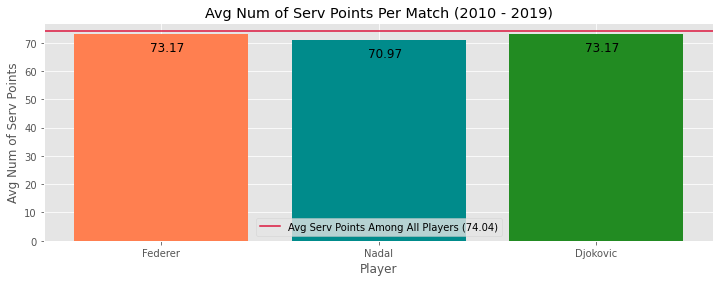

In [464]:
# Serv points - questionable
fig, ax = plt.subplots(figsize=(12, 4))
avg_svpt = con_tennis['svpt'].mean() # how can the avg be higher than the 3 top guys?
x = ['Federer', 'Nadal', 'Djokovic']
y = [con_tennis.groupby(['name']).mean()['svpt']['Roger Federer'].round(2), con_tennis.groupby(['name']).mean()['svpt']['Rafael Nadal'].round(2), con_tennis.groupby(['name']).mean()['svpt']['Novak Djokovic'].round(2)]

ax.bar(x, y, color=['coral', 'darkcyan', 'forestgreen'])
# ax.bar(x, y, color='b')
# ax.bar(x, y)
ax.axhline(avg_svpt, label=f"Avg Serv Points Among All Players ({avg_svpt:.2f})", color='crimson')
ax.set_xlabel('Player')
ax.set_ylabel('Avg Num of Serv Points')
ax.set_title('Avg Num of Serv Points Per Match (2010 - 2019)')
ax.legend(loc='best')


for index, value in enumerate(y):
    ax.text(index - 0.05, value - 6, str(value), c='black', fontsize=12)

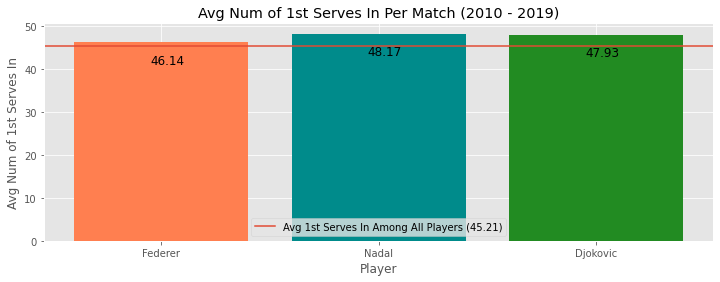

In [465]:
fig, ax = plt.subplots(figsize=(12, 4))
avg_1stIn = con_tennis['1stIn'].mean()
x = ['Federer', 'Nadal', 'Djokovic']
y = [con_tennis.groupby(['name']).mean()['1stIn']['Roger Federer'].round(2), con_tennis.groupby(['name']).mean()['1stIn']['Rafael Nadal'].round(2), con_tennis.groupby(['name']).mean()['1stIn']['Novak Djokovic'].round(2)]

ax.bar(x, y, color=['coral', 'darkcyan', 'forestgreen'])
ax.axhline(avg_1stIn, label=f"Avg 1st Serves In Among All Players ({avg_1stIn:.2f})")
ax.set_xlabel('Player')
ax.set_ylabel('Avg Num of 1st Serves In')
ax.set_title('Avg Num of 1st Serves In Per Match (2010 - 2019)')
ax.legend(loc=8)


for index, value in enumerate(y):
    ax.text(index - 0.05, value - 5, str(value), c='black', fontsize=12)

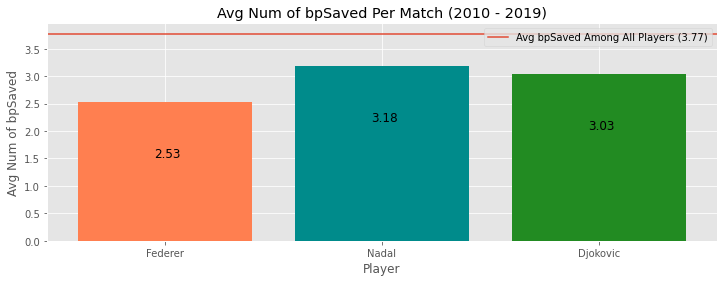

In [466]:
# bpFaced vs bpSaved - % of trouble gotten out of

fig, ax = plt.subplots(figsize=(12, 4))
avg_bpSaved = con_tennis['bpSaved'].mean()
x = ['Federer', 'Nadal', 'Djokovic']
# y1 = con_tennis.groupby(['name']).mean()['bpSaved']['Roger Federer'].round(2)
# y2 = con_tennis.groupby(['name']).mean()['bpSaved']['Rafael Nadal'].round(2)
# y3 = con_tennis.groupby(['name']).mean()['bpSaved']['Novak Djokovic'].round(2)
y = [con_tennis.groupby(['name']).mean()['bpSaved']['Roger Federer'].round(2), con_tennis.groupby(['name']).mean()['bpSaved']['Rafael Nadal'].round(2), con_tennis.groupby(['name']).mean()['bpSaved']['Novak Djokovic'].round(2)]

ax.bar(x, y, color=['coral', 'darkcyan', 'forestgreen'])
ax.axhline(avg_bpSaved, label=f"Avg bpSaved Among All Players ({avg_bpSaved:.2f})")
ax.set_xlabel('Player')
ax.set_ylabel('Avg Num of bpSaved')
ax.set_title('Avg Num of bpSaved Per Match (2010 - 2019)')
ax.legend(loc='best')


for index, value in enumerate(y):
    ax.text(index - 0.05, value - 1, str(value), c='black', fontsize=12)

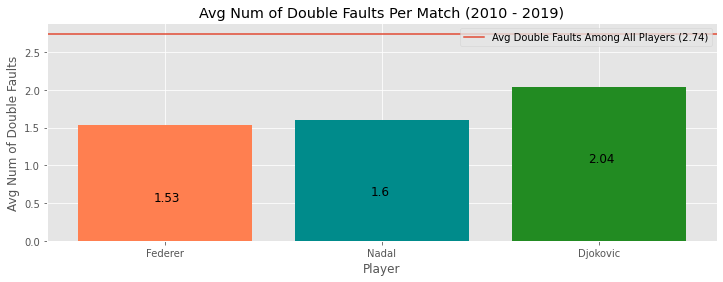

In [467]:
fig, ax = plt.subplots(figsize=(12, 4))
avg_df = con_tennis['df'].mean()
x = ['Federer', 'Nadal', 'Djokovic']
y = [con_tennis.groupby(['name']).mean()['df']['Roger Federer'].round(2), con_tennis.groupby(['name']).mean()['df']['Rafael Nadal'].round(2), con_tennis.groupby(['name']).mean()['df']['Novak Djokovic'].round(2)]

ax.bar(x, y, color=['coral', 'darkcyan', 'forestgreen'])
ax.axhline(avg_df, label=f"Avg Double Faults Among All Players ({avg_df:.2f})")
ax.set_xlabel('Player')
ax.set_ylabel('Avg Num of Double Faults')
ax.set_title('Avg Num of Double Faults Per Match (2010 - 2019)')
ax.legend(loc='best')


for index, value in enumerate(y):
    ax.text(index - 0.05, value - 1, str(value), c='black', fontsize=12)

## Wins and Losses

In [95]:
# Wins and Losses

# Federer
fed_wins = con_tennis[((con_tennis['win'] == 1) & (con_tennis['name'] == 'Roger Federer'))]
n_fed_wins = len(con_tennis[((con_tennis['win'] == 1) & (con_tennis['name'] == 'Roger Federer'))])
fed_losses = con_tennis[((con_tennis['win'] == 0) & (con_tennis['name'] == 'Roger Federer'))]
n_fed_losses = len(con_tennis[((con_tennis['win'] == 0) & (con_tennis['name'] == 'Roger Federer'))])

# Nadal
nadal_wins = con_tennis[((con_tennis['win'] == 1) & (con_tennis['name'] == 'Rafael Nadal'))]
n_nadal_wins = len(con_tennis[((con_tennis['win'] == 1) & (con_tennis['name'] == 'Rafael Nadal'))])
nadal_losses = con_tennis[((con_tennis['win'] == 0) & (con_tennis['name'] == 'Rafael Nadal'))]
n_nadal_losses = len(con_tennis[((con_tennis['win'] == 0) & (con_tennis['name'] == 'Rafael Nadal'))])

# Djok
djok_wins = con_tennis[((con_tennis['win'] == 1) & (con_tennis['name'] == 'Novak Djokovic'))]
n_djok_wins = len(con_tennis[((con_tennis['win'] == 1) & (con_tennis['name'] == 'Novak Djokovic'))])
djok_losses = con_tennis[((con_tennis['win'] == 0) & (con_tennis['name'] == 'Novak Djokovic'))]
n_djok_losses = len(con_tennis[((con_tennis['win'] == 0) & (con_tennis['name'] == 'Novak Djokovic'))])

[Text(0, 0, '112'), Text(0, 0, '110'), Text(0, 0, '100')]

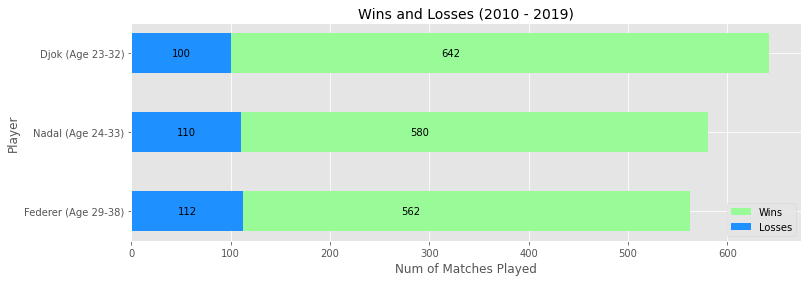

In [92]:
# Grouped barchart of wins/losses for each player
fig, ax = plt.subplots(figsize=(12, 4))

x = ['Federer (Age 29-38)', 'Nadal (Age 24-33)', 'Djok (Age 23-32)']
wins = [n_fed_wins, n_nadal_wins, n_djok_wins]
losses = [n_fed_losses, n_nadal_losses, n_djok_losses]
width = 0.5

p1 = ax.barh(x, wins, width, color='palegreen', label='Wins')
p2 = ax.barh(x, losses, width, color='dodgerblue', label='Losses')
ax.set_title('Wins and Losses (2010 - 2019)', fontsize=14)
ax.set_xlabel('Num of Matches Played')
ax.set_ylabel('Player')
ax.legend()

ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')

## Major Championships

In [83]:
# What percent of grand slams did they win?
fed_gs_aus = con_tennis[((con_tennis["name"] == "Roger Federer") & (con_tennis["tourney_name"] == "Australian Open") & (con_tennis['win'] == 1))]
fed_gs_fren = con_tennis[((con_tennis["name"] == "Roger Federer") & (con_tennis["tourney_name"] == "Roland Garros") & (con_tennis['win'] == 1))]
fed_gs_wim = con_tennis[((con_tennis["name"] == "Roger Federer") & (con_tennis["tourney_name"] == "Wimbledon") & (con_tennis['win'] == 1))]
fed_gs_us = con_tennis[((con_tennis["name"] == "Roger Federer") & (con_tennis["tourney_name"] == "US Open") & (con_tennis['win'] == 1))]
fed_gs_titles = con_tennis[((con_tennis["name"] == "Roger Federer") & (con_tennis["tourney_level"] == "G") & (con_tennis['round'] == "F") & (con_tennis['win'] == 1))]
fed_gs_total = len(fed_gs_aus) + len(fed_gs_fren) + len(fed_gs_wim) + len(fed_gs_us)
n_fed_gs_titles = len(fed_gs_titles)

nadal_gs_aus = con_tennis[((con_tennis["name"] == "Rafael Nadal") & (con_tennis["tourney_name"] == "Australian Open") & (con_tennis['win'] == 1))]
nadal_gs_fren = con_tennis[((con_tennis["name"] == "Rafael Nadal") & (con_tennis["tourney_name"] == "Roland Garros") & (con_tennis['win'] == 1))]
nadal_gs_wim = con_tennis[((con_tennis["name"] == "Rafael Nadal") & (con_tennis["tourney_name"] == "Wimbledon") & (con_tennis['win'] == 1))]
nadal_gs_us = con_tennis[((con_tennis["name"] == "Rafael Nadal") & (con_tennis["tourney_name"] == "US Open") & (con_tennis['win'] == 1))]
nadal_gs_titles = con_tennis[((con_tennis["name"] == "Rafael Nadal") & (con_tennis["tourney_level"] == "G") & (con_tennis['round'] == "F") & (con_tennis['win'] == 1))]
nadal_gs_total = len(nadal_gs_aus) + len(nadal_gs_fren) + len(nadal_gs_wim) + len(nadal_gs_us)
n_nadal_gs_titles = len(nadal_gs_titles)

djok_gs_aus = con_tennis[((con_tennis["name"] == "Novak Djokovic") & (con_tennis["tourney_name"] == "Australian Open") & (con_tennis['win'] == 1))]
djok_gs_fren = con_tennis[((con_tennis["name"] == "Novak Djokovic") & (con_tennis["tourney_name"] == "Roland Garros") & (con_tennis['win'] == 1))]
djok_gs_wim = con_tennis[((con_tennis["name"] == "Novak Djokovic") & (con_tennis["tourney_name"] == "Wimbledon") & (con_tennis['win'] == 1))]
djok_gs_us = con_tennis[((con_tennis["name"] == "Novak Djokovic") & (con_tennis["tourney_name"] == "US Open") & (con_tennis['win'] == 1))]
djok_gs_titles = con_tennis[((con_tennis["name"] == "Novak Djokovic") & (con_tennis["tourney_level"] == "G") & (con_tennis['round'] == "F") & (con_tennis['win'] == 1))]
djok_gs_total = len(djok_gs_aus) + len(djok_gs_fren) + len(djok_gs_wim) + len(djok_gs_us)
n_djok_gs_titles = len(djok_gs_titles)

combined_gs_total_losses = 78
combined_gs_total_wins = fed_gs_total + nadal_gs_total + djok_gs_total
combined_gs_titles = fed_gs_titles + nadal_gs_titles + djok_gs_titles

In [84]:
print(f"These 3 players have won a combined {combined_gs_total_wins} matches out of {combined_gs_total_wins + combined_gs_total_losses} and in major tournaments from 2010 - 2019. Claiming {len(combined_gs_titles)} titles out of a possible 40.")
print(f"\n Federer has won {fed_gs_total} matches, with {n_fed_gs_titles} titles.")
print(f"\n Nadal has won {nadal_gs_total} matches, with {n_nadal_gs_titles} titles.")
print(f"\n Djokovic has won {djok_gs_total} matches, with {n_djok_gs_titles} titles.")

These 3 players have won a combined 564 matches out of 642 and in major tournaments from 2010 - 2019. Claiming 33 titles out of a possible 40.

 Federer has won 171 matches, with 5 titles.

 Nadal has won 177 matches, with 13 titles.

 Djokovic has won 216 matches, with 15 titles.


[Text(0, 0, '5'), Text(0, 0, '13'), Text(0, 0, '15')]

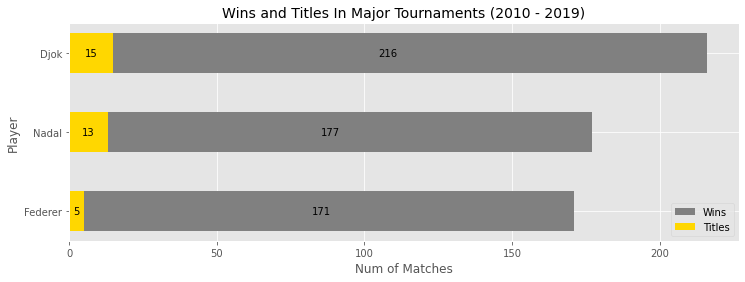

In [118]:
# Grouped barchart of wins/titles for each player
fig, ax = plt.subplots(figsize=(12, 4))

x = ['Federer', 'Nadal', 'Djok']
wins = [fed_gs_total, nadal_gs_total, djok_gs_total]
titles = [n_fed_gs_titles, n_nadal_gs_titles, n_djok_gs_titles]
width = 0.5

p1 = ax.barh(x, wins, width, color='gray', label='Wins')
p2 = ax.barh(x, titles, width, color='gold', label='Titles')
ax.set_title('Wins and Titles In Major Tournaments (2010 - 2019)', fontsize=14)
ax.set_xlabel('Num of Matches')
ax.set_ylabel('Player')
ax.legend()

ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')

Text(0.5, 1.0, 'Share of Major Tournament Wins Between Each Other')

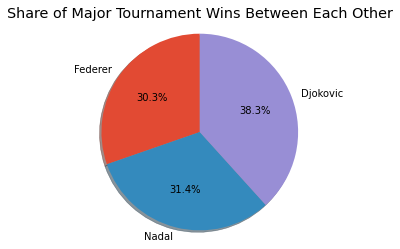

In [127]:
fig, ax = plt.subplots()
labels = ['Federer', 'Nadal', 'Djokovic']
x = [fed_gs_total, nadal_gs_total, djok_gs_total]

ax.pie(x, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Share of Major Tournament Wins Between Each Other')

Text(0.5, 1.0, 'Share of Major Tournament Titles Between Each Other')

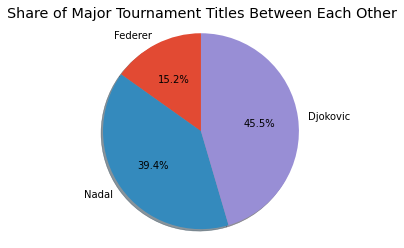

In [128]:
fig, ax = plt.subplots()
labels = ['Federer', 'Nadal', 'Djokovic']
x = [len(fed_gs_titles), len(nadal_gs_titles), len(djok_gs_titles)]

ax.pie(x, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Share of Major Tournament Titles Between Each Other')

## Surface Comparisons

In [105]:
# Federer
# Hard
fed_hard_wins = con_tennis[((con_tennis['win'] == 1) & (con_tennis['name'] == 'Roger Federer') & (con_tennis['surface'] == 'Hard'))]
n_fed_hard_wins = len(con_tennis[((con_tennis['win'] == 1) & (con_tennis['name'] == 'Roger Federer') & (con_tennis['surface'] == 'Hard'))])
fed_hard_loss = con_tennis[((con_tennis['win'] == 0) & (con_tennis['name'] == 'Roger Federer') & (con_tennis['surface'] == 'Hard'))]
n_fed_hard_loss = len(con_tennis[((con_tennis['win'] == 0) & (con_tennis['name'] == 'Roger Federer') & (con_tennis['surface'] == 'Hard'))])
# Clay
fed_clay_wins = con_tennis[((con_tennis['win'] == 1) & (con_tennis['name'] == 'Roger Federer') & (con_tennis['surface'] == 'Clay'))]
n_fed_clay_wins = len(con_tennis[((con_tennis['win'] == 1) & (con_tennis['name'] == 'Roger Federer') & (con_tennis['surface'] == 'Clay'))])
fed_clay_loss = con_tennis[((con_tennis['win'] == 0) & (con_tennis['name'] == 'Roger Federer') & (con_tennis['surface'] == 'Clay'))]
n_fed_clay_loss = len(con_tennis[((con_tennis['win'] == 0) & (con_tennis['name'] == 'Roger Federer') & (con_tennis['surface'] == 'Clay'))])
# Grass
fed_grass_wins = con_tennis[((con_tennis['win'] == 1) & (con_tennis['name'] == 'Roger Federer') & (con_tennis['surface'] == 'Grass'))]
n_fed_grass_wins = len(con_tennis[((con_tennis['win'] == 1) & (con_tennis['name'] == 'Roger Federer') & (con_tennis['surface'] == 'Grass'))])
fed_grass_loss = con_tennis[((con_tennis['win'] == 0) & (con_tennis['name'] == 'Roger Federer') & (con_tennis['surface'] == 'Grass'))]
n_fed_grass_loss = len(con_tennis[((con_tennis['win'] == 0) & (con_tennis['name'] == 'Roger Federer') & (con_tennis['surface'] == 'Grass'))])

# Nadal
# Hard
nadal_hard_wins = con_tennis[((con_tennis['win'] == 1) & (con_tennis['name'] == 'Rafael Nadal') & (con_tennis['surface'] == 'Hard'))]
n_nadal_hard_wins = len(con_tennis[((con_tennis['win'] == 1) & (con_tennis['name'] == 'Rafael Nadal') & (con_tennis['surface'] == 'Hard'))])
nadal_hard_loss = con_tennis[((con_tennis['win'] == 0) & (con_tennis['name'] == 'Rafael Nadal') & (con_tennis['surface'] == 'Hard'))]
n_nadal_hard_loss = len(con_tennis[((con_tennis['win'] == 0) & (con_tennis['name'] == 'Rafael Nadal') & (con_tennis['surface'] == 'Hard'))])
# Clay
nadal_clay_wins = con_tennis[((con_tennis['win'] == 1) & (con_tennis['name'] == 'Rafael Nadal') & (con_tennis['surface'] == 'Clay'))]
n_nadal_clay_wins = len(con_tennis[((con_tennis['win'] == 1) & (con_tennis['name'] == 'Rafael Nadal') & (con_tennis['surface'] == 'Clay'))])
nadal_clay_loss = con_tennis[((con_tennis['win'] == 0) & (con_tennis['name'] == 'Rafael Nadal') & (con_tennis['surface'] == 'Clay'))]
n_nadal_clay_loss = len(con_tennis[((con_tennis['win'] == 0) & (con_tennis['name'] == 'Rafael Nadal') & (con_tennis['surface'] == 'Clay'))])
# Grass
nadal_grass_wins = con_tennis[((con_tennis['win'] == 1) & (con_tennis['name'] == 'Rafael Nadal') & (con_tennis['surface'] == 'Grass'))]
n_nadal_grass_wins = len(con_tennis[((con_tennis['win'] == 1) & (con_tennis['name'] == 'Rafael Nadal') & (con_tennis['surface'] == 'Grass'))])
nadal_grass_loss = con_tennis[((con_tennis['win'] == 0) & (con_tennis['name'] == 'Rafael Nadal') & (con_tennis['surface'] == 'Grass'))]
n_nadal_grass_loss = len(con_tennis[((con_tennis['win'] == 0) & (con_tennis['name'] == 'Rafael Nadal') & (con_tennis['surface'] == 'Grass'))])


# Djokovic
# Hard
djok_hard_wins = con_tennis[((con_tennis['win'] == 1) & (con_tennis['name'] == 'Novak Djokovic') & (con_tennis['surface'] == 'Hard'))]
n_djok_hard_wins = len(con_tennis[((con_tennis['win'] == 1) & (con_tennis['name'] == 'Novak Djokovic') & (con_tennis['surface'] == 'Hard'))])
djok_hard_loss = con_tennis[((con_tennis['win'] == 0) & (con_tennis['name'] == 'Novak Djokovic') & (con_tennis['surface'] == 'Hard'))]
n_djok_hard_loss = len(con_tennis[((con_tennis['win'] == 0) & (con_tennis['name'] == 'Novak Djokovic') & (con_tennis['surface'] == 'Hard'))])
# Clay
djok_clay_wins = con_tennis[((con_tennis['win'] == 1) & (con_tennis['name'] == 'Novak Djokovic') & (con_tennis['surface'] == 'Clay'))]
n_djok_clay_wins = len(con_tennis[((con_tennis['win'] == 1) & (con_tennis['name'] == 'Novak Djokovic') & (con_tennis['surface'] == 'Clay'))])
djok_clay_loss = con_tennis[((con_tennis['win'] == 0) & (con_tennis['name'] == 'Novak Djokovic') & (con_tennis['surface'] == 'Clay'))]
n_djok_clay_loss = len(con_tennis[((con_tennis['win'] == 0) & (con_tennis['name'] == 'Novak Djokovic') & (con_tennis['surface'] == 'Clay'))])
# Grass
djok_grass_wins = con_tennis[((con_tennis['win'] == 1) & (con_tennis['name'] == 'Novak Djokovic') & (con_tennis['surface'] == 'Grass'))]
n_djok_grass_wins = len(con_tennis[((con_tennis['win'] == 1) & (con_tennis['name'] == 'Novak Djokovic') & (con_tennis['surface'] == 'Grass'))])
djok_grass_loss = con_tennis[((con_tennis['win'] == 0) & (con_tennis['name'] == 'Novak Djokovic') & (con_tennis['surface'] == 'Grass'))]
n_djok_grass_loss = len(con_tennis[((con_tennis['win'] == 0) & (con_tennis['name'] == 'Novak Djokovic') & (con_tennis['surface'] == 'Grass'))])

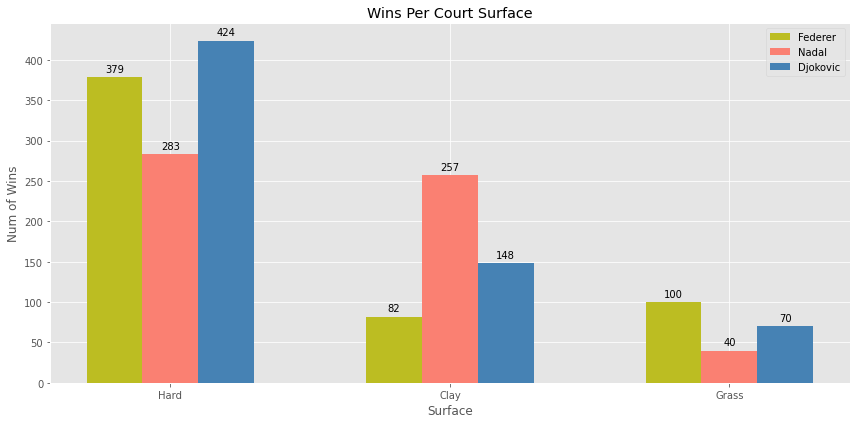

In [117]:
labels = ['Hard', 'Clay', 'Grass']
fed_surf_wins = [n_fed_hard_wins, n_fed_clay_wins, n_fed_grass_wins]
nadal_surf_wins = [n_nadal_hard_wins, n_nadal_clay_wins, n_nadal_grass_wins]
djok_surf_wins = [n_djok_hard_wins, n_djok_clay_wins, n_djok_grass_wins]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x-width, fed_surf_wins, width, label='Federer', color='tab:olive')
rects2 = ax.bar(x, nadal_surf_wins, width, label='Nadal', color='salmon')
rects3 = ax.bar(x+width, djok_surf_wins, width, label='Djokovic', color='steelblue')

ax.set_ylabel('Num of Wins')
ax.set_xlabel('Surface')
ax.set_title('Wins Per Court Surface (2010 - 2019)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

# Hypothesis Testing

## Test 1: 
> $H_0$: Federer performs equally or worse than Nadal in terms of ['ace', 'svpt', '1stIn', '1stWon', '2ndWon', 'SvGms', 'bpSaved', 'win', 'df', 'bpFaced']

> $H_A$: Federer performs better than Nadal in terms of ['ace', 'svpt', '1stIn', '1stWon', '2ndWon', 'SvGms', 'bpSaved', 'win', 'df', 'bpFaced']  

In [306]:
def greater_comparison(df1, df2, lst):
    score_lst = []
    for item in g_lst:
        wins, p_val = stats.mannwhitneyu(df1[item], df2[item], alternative='greater')
        score_lst.append(wins)
        score_lst.append(p_val)
    return score_lst

In [307]:
def less_comparison(df1, df2, lst):
    score_lst = []
    for item in l_lst:
        wins, p_val = stats.mannwhitneyu(df1[item], df2[item], alternative='less')
        score_lst.append(wins)
        score_lst.append(p_val)                                 
    return score_lst

In [268]:
# Creating DF for each player
fed = con_tennis[(con_tennis["name"] == "Roger Federer")]
nadal = con_tennis[(con_tennis["name"] == "Rafael Nadal")]
djok = con_tennis[(con_tennis["name"] == "Novak Djokovic")]
#con_tennis.columns

In [341]:
g_lst = ['ace', 'svpt', '1stIn', '1stWon', '2ndWon', 'SvGms', 'bpSaved', 'win'] # stats you want more of
l_lst = ['df', 'bpFaced'] # stats you want less of

#### Comparing Aces (Nadal > Fed)

In [203]:
# Players Aces (series)
fed_aces = fed['ace']
nadal_aces = nadal['ace']
djok_aces = djok['ace']

In [243]:
# stat, p_val = stats.ttest_ind(fed_aces, nadal_aces, equal_var=False) 
# print(f'For fed, nadal aces...\nT-stat: {stat}\nP-val: {p_val}')

In [233]:
fed_ace_wins, p_val = stats.mannwhitneyu(fed_aces, nadal_aces, alternative='greater')
nadal_ace_wins, _ = stats.mannwhitneyu(nadal_aces, fed_aces, alternative='greater')
print(f" Fed Ace Wins: {fed_ace_wins}\n Nadal Ace Wins: {nadal_ace_wins}\n P_Val: {p_val}") # Only want the first p_val since we are stating Federer < Nadal

 Fed Ace Wins: 379443.0
 Nadal Ace Wins: 85617.0
 P_Val: 1.1919754872754445e-91


#### Svpt (Nadal > Fed)

In [231]:
# Test Serve Points
fed_svpt = fed['svpt']
nadal_svpt = nadal['svpt']
djok_svpt = djok['svpt']

In [244]:
# stat, p_val = stats.ttest_ind(fed_svpt, nadal_svpt, equal_var=False) 
# print(f'For fed, nadal svpt...\nT-stat: {stat}\nP-val: {p_val}')

In [235]:
fed_svpt_wins, p_val = stats.mannwhitneyu(fed_svpt, nadal_svpt, alternative='greater')
nadal_svpt_wins, _ = stats.mannwhitneyu(nadal_svpt, fed_svpt, alternative='greater')
print(f" Fed Ace Wins: {fed_svpt_wins}\n Nadal Ace Wins: {nadal_svpt_wins}\n P_Val: {p_val}")

 Fed Ace Wins: 244524.0
 Nadal Ace Wins: 220536.0
 P_Val: 0.04955776347802703


In [311]:
# Before I rearranged hypothesis
print(f' Fed, Nadal Stats = {greater_comparison(df1=fed, df2=nadal, lst=g_lst)}\n')
print(f' Nadal, Fed Stats = {greater_comparison(df1=nadal, df2=fed, lst=g_lst,)}\n')

 Fed, Nadal Stats = [379443.0, 1.1919754872754445e-91, 244524.0, 0.04955776347802703, 220722.5, 0.9477890743479132, 252314.0, 0.003255046926093683, 292803.0, 5.3056597152380315e-17, 263752.5, 8.196699269044679e-06, 203418.0, 0.9999747251353331, 230960.0, 0.6322114489682835]

 Nadal, Fed Stats = [85617.0, 1.0, 220536.0, 0.9504563163570096, 244337.5, 0.05222560692614206, 212709.0, 0.9967960498115387, 172260.0, 1.0, 201334.5, 0.9999916692902585, 261642.0, 2.5289916058991122e-05, 234100.0, 0.36786958621198623]



In [301]:
print(f' Fed, Nadal Stats = {less_comparison(df1=fed, df2=nadal, lst=l_lst)}\n')
print(f' Nadal, Fed Stats = {less_comparison(df1=nadal, df2=fed, lst=l_lst)}\n')

 Fed, Nadal Stats = [227241.0, 0.22702199590055044, 197077.0, 4.6900003453480326e-07]

 Nadal, Fed Stats = [237819.0, 0.7730206755695463, 267983.0, 0.9999995313303345]



In [342]:
# After rearranging Hypothesis
# Hypothesis: Fed performs equally or worse than Nadal in ...
# Get Federer wins and pvals
fed_wins1 = greater_comparison(df1=fed, df2=nadal, lst=l_lst)[::2] + less_comparison(df1=fed, df2=nadal, lst=g_lst)[::2]
fed_pvals1 = greater_comparison(df1=fed, df2=nadal, lst=l_lst)[1::2] + less_comparison(df1=fed, df2=nadal, lst=g_lst)[1::2]
print(f' Fed wins = {fed_wins1}\n')
print(f' Fed p-vals = {fed_pvals1}\n')

 Fed wins = [379443.0, 244524.0, 220722.5, 252314.0, 292803.0, 263752.5, 203418.0, 230960.0, 227241.0, 197077.0]

 Fed p-vals = [1.1919754872754445e-91, 0.04955776347802703, 0.9477890743479132, 0.003255046926093683, 5.3056597152380315e-17, 8.196699269044679e-06, 0.9999747251353331, 0.6322114489682835, 0.22702199590055044, 4.6900003453480326e-07]



In [423]:
# Hypothesis: Fed performs equally or worse than Nadal in ...
# ONLY need to get Nadal wins and (p_vals need to be filtered around)
nadal_wins1 = greater_comparison(df1=nadal, df2=fed, lst=l_lst)[::2] + less_comparison(df1=nadal, df2=fed, lst=g_lst)[::2]
nadal_pvals1 = greater_comparison(df1=nadal, df2=fed, lst=l_lst)[1::2] + less_comparison(df1=nadal, df2=fed, lst=g_lst)[1::2]
print(f' Nadal Wins = {nadal_wins1}\n')
print(f' Nadal p-vals = {nadal_pvals1}\n')

 Nadal Wins = [85617.0, 220536.0, 244337.5, 212709.0, 172260.0, 201334.5, 261642.0, 234100.0, 237819.0, 267983.0]

 Nadal p-vals = [1.0, 0.9504563163570096, 0.05222560692614206, 0.9967960498115387, 1.0, 0.9999916692902585, 2.5289916058991122e-05, 0.36786958621198623, 0.7730206755695463, 0.9999995313303345]



In [368]:
# fed_win_totals1 = [379443.0, 244524.0, 220722.5, 252314.0, 292803.0, 263752.5, 203418.0, 227241.0, 197077.0]
# nadal_win_totals1 = [85617.0, 220536.0, 244337.5, 212709.0, 172260.0, 201334.5, 261642.0, 237819.0, 267983.0]
# p_vals_fed_vs_nadal = [1.1919754872754445e-91, 0.04955776347802703, 0.9477890743479132, 0.003255046926093683, 5.3056597152380315e-17, 8.196699269044679e-06, 0.9999747251353331, 0.22702199590055044, 4.6900003453480326e-07]
#p_vals_fed_vs_nadal2 = [1.0, 0.9504563163570096, 0.05222560692614206, 0.9967960498115387, 1.0, 0.9999916692902585, 2.5289916058991122e-05, 0.7730206755695463, 0.9999995313303345]


In [416]:
# ORDER OF LIST BELOW ['ace', 'svpt', '1stIn', '1stWon', '2ndWon', 'SvGms', 'bpSaved', 'win', 'df', 'bpFaced']
alpha = 0.05

total_comparisons = []
for fed_v, nadal_v in zip(fed_wins1, nadal_wins1):
    total_comparisons.append(fed_v + nadal_v)
    
data1 = {   "Federer Wins": [i for i in fed_wins1],
            "Nadal Wins": [i for i in nadal_wins1],
            "Total Trials": [i for i in total_comparisons],
            "P-Value": [i.round(5) for i in fed_pvals1],
            "Reject Null?": ['Reject Null' if p_val < alpha else 'Fail to Reject Null' for p_val in fed_pvals1]
}
fed_vs_nadal = pd.DataFrame(data1, index=['Aces', 'Serve Points', '1st Serve In', '1st Serve Points Won', '2nd Serve Points Won', 'Service Games', 'Break Points Saved', 'Wins', 'Double Faults', 'Break Points Faced'])
fed_vs_nadal

,Federer Wins,Nadal Wins,Total Trials,P-Value,Reject Null?
Aces,379443.0,85617.0,465060.0,0.00000,Reject Null
Serve Points,244524.0,220536.0,465060.0,0.04956,Reject Null
1st Serve In,220722.5,244337.5,465060.0,0.94779,Fail to Reject Null
1st Serve Points Won,252314.0,212709.0,465023.0,0.00326,Reject Null
2nd Serve Points Won,292803.0,172260.0,465063.0,0.00000,Reject Null
Service Games,263752.5,201334.5,465087.0,0.00001,Reject Null
Break Points Saved,203418.0,261642.0,465060.0,0.99997,Fail to Reject Null
Wins,230960.0,234100.0,465060.0,0.63221,Fail to Reject Null
Double Faults,227241.0,237819.0,465060.0,0.22702,Fail to Reject Null
Break Points Faced,197077.0,267983.0,465060.0,0.00000,Reject Null


## Test 2:
> $H_0$: Djokovic performs equally or worse than Federer in terms of ['ace', 'svpt', '1stIn', '1stWon', '2ndWon', 'SvGms', 'bpSaved', 'win', 'df', 'bpFaced']

> $H_A$: Djokovic performs better than Federer in terms of ['ace', 'svpt', '1stIn', '1stWon', '2ndWon', 'SvGms', 'bpSaved', 'win', 'df', 'bpFaced']

In [363]:
# Hypothesis: Djok performs equally or worse than Federer in ...
# Get Djokovic wins & pvals

djok_wins1 = greater_comparison(df1=djok, df2=fed, lst=l_lst)[::2] + less_comparison(df1=djok, df2=fed, lst=g_lst)[::2]
djok_pvals1 = greater_comparison(df1=djok, df2=fed, lst=l_lst)[1::2] + less_comparison(df1=djok, df2=fed, lst=g_lst)[1::2]

print(f' Djok wins = {djok_wins1}\n')
print(f' Djok p-vals = {djok_pvals1}\n')

 Djok wins = [156149.0, 247484.0, 261307.0, 241950.0, 218106.5, 236319.5, 273656.5, 257906.0, 281380.5, 283695.5]

 Djok p-vals = [1.0, 0.6310122536857776, 0.07151696994668345, 0.8542822035983488, 0.999984288289332, 0.9635899192923532, 0.0009279826877706439, 0.04913641767569531, 0.9999853245659177, 0.9999947248594356]



In [422]:
# Hypothesis: Djok performs equally or worse than Federer in ...
# ONLY need to get Federer wins and (p_vals need to be filtered around)

fed_wins2 = greater_comparison(df1=fed, df2=djok, lst=l_lst)[::2] + less_comparison(df1=fed, df2=djok, lst=g_lst)[::2]
fed_pvals2 = greater_comparison(df1=fed, df2=djok, lst=l_lst)[1::2] + less_comparison(df1=fed, df2=djok, lst=g_lst)[1::2]

print(f' Fed Wins = {fed_wins2}\n')
print(f' Fed p-vals = {fed_pvals2}\n')

 Fed Wins = [343959.0, 252624.0, 238801.0, 258078.0, 282155.5, 263785.5, 226451.5, 242202.0, 218727.5, 216412.5]

 Fed p-vals = [7.483743615841353e-35, 0.36903684188655095, 0.928500794476179, 0.1481424052302433, 1.4394885348384787e-05, 0.03645179802546156, 0.999072431789309, 0.9508849959289873, 1.4684041353944937e-05, 5.278328594977639e-06]



In [417]:
alpha = 0.05

total_comparisons2 = []
for djok_v, fed_v in zip(djok_wins1, fed_wins2):
    total_comparisons2.append(djok_v + fed_v)
    
data2 = {   "Djokovic Wins": [i for i in djok_wins1],
            "Federer Wins": [i for i in fed_wins2],
            "Total Trials": [i for i in total_comparisons2],
            "P-Value": [i.round(5) for i in djok_pvals1],
            "Reject Null?": ['Reject Null' if p_val < alpha else 'Fail to Reject Null' for p_val in djok_pvals1]
}
djok_vs_fed = pd.DataFrame(data2, index=['Aces', 'Serve Points', '1st Serve In', '1st Serve Points Won', '2nd Serve Points Won', 'Service Games', 'Break Points Saved', 'Wins', 'Double Faults', 'Break Points Faced'])
djok_vs_fed

,Djokovic Wins,Federer Wins,Total Trials,P-Value,Reject Null?
Aces,156149.0,343959.0,500108.0,1.00000,Fail to Reject Null
Serve Points,247484.0,252624.0,500108.0,0.63101,Fail to Reject Null
1st Serve In,261307.0,238801.0,500108.0,0.07152,Fail to Reject Null
1st Serve Points Won,241950.0,258078.0,500028.0,0.85428,Fail to Reject Null
2nd Serve Points Won,218106.5,282155.5,500262.0,0.99998,Fail to Reject Null
Service Games,236319.5,263785.5,500105.0,0.96359,Fail to Reject Null
Break Points Saved,273656.5,226451.5,500108.0,0.00093,Reject Null
Wins,257906.0,242202.0,500108.0,0.04914,Reject Null
Double Faults,281380.5,218727.5,500108.0,0.99999,Fail to Reject Null
Break Points Faced,283695.5,216412.5,500108.0,0.99999,Fail to Reject Null


    Asked myself "how can this be? ...given the number of titles Djokovic has"
* Federer might be statistically better, but let me check their h2h record in order to explain Djokovic's > num of wins in regular matches and grand slam titles
    * Federer 'fine tuned' machine

In [400]:
#final_tennis[(final_tennis['winner_name'] == 'Novak Djokovic') & (final_tennis['loser_name'] == 'Roger Federer')]
djok_fed_h2h = copy_tennis[(copy_tennis['winner_name'] == 'Novak Djokovic') & (copy_tennis['loser_name'] == 'Roger Federer')]
djok_fed_h2h # Federer has lost to Djokovic 22 times! 9 times in major tournaments

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
263,2016-580,Australian Open,Hard,128,G,20160118,224,104925,1.0,NaN,...,57.0,35.0,21.0,16.0,4.0,9.0,1.0,16790.0,3.0,8165.0
272,2011-580,Australian Open,Hard,128,G,20110117,126,104925,3.0,NaN,...,62.0,45.0,20.0,17.0,9.0,14.0,3.0,6240.0,2.0,9245.0
633,2011-495,Dubai,Hard,32,A,20110221,31,104925,2.0,NaN,...,35.0,22.0,9.0,9.0,6.0,10.0,3.0,7880.0,2.0,7965.0
830,2014-404,Indian Wells Masters,Hard,96,M,20140306,95,104925,2.0,NaN,...,64.0,45.0,21.0,15.0,4.0,6.0,2.0,10260.0,8.0,4625.0
835,2015-404,Indian Wells Masters,Hard,96,M,20150312,95,104925,1.0,NaN,...,57.0,41.0,15.0,14.0,8.0,13.0,1.0,13205.0,2.0,9205.0
858,2011-404,Indian Wells Masters,Hard,96,M,20110310,94,104925,3.0,NaN,...,48.0,33.0,15.0,13.0,5.0,10.0,3.0,7800.0,2.0,7965.0
1304,2015-416,Rome Masters,Clay,56,M,20150510,55,104925,1.0,NaN,...,39.0,30.0,8.0,9.0,3.0,5.0,1.0,13845.0,2.0,8645.0
1430,2012-416,Rome Masters,Clay,56,M,20120513,53,104925,1.0,NaN,...,32.0,25.0,16.0,10.0,3.0,6.0,1.0,11200.0,2.0,9430.0
1611,2012-520,Roland Garros,Clay,128,G,20120527,125,104925,1.0,NaN,...,48.0,27.0,17.0,15.0,3.0,10.0,1.0,11800.0,3.0,9790.0
1628,2019-540,Wimbledon,Grass,128,G,20190701,226,104925,1.0,NaN,...,127.0,100.0,39.0,34.0,5.0,8.0,1.0,12415.0,3.0,6620.0


In [404]:
copy_tennis[(copy_tennis['winner_name'] == 'Novak Djokovic') & (copy_tennis['loser_name'] == 'Roger Federer') & (copy_tennis['tourney_level'] == 'G') & (copy_tennis['tourney_level'] == 'G')]

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
263,2016-580,Australian Open,Hard,128,G,20160118,224,104925,1.0,NaN,...,57.0,35.0,21.0,16.0,4.0,9.0,1.0,16790.0,3.0,8165.0
272,2011-580,Australian Open,Hard,128,G,20110117,126,104925,3.0,NaN,...,62.0,45.0,20.0,17.0,9.0,14.0,3.0,6240.0,2.0,9245.0
1611,2012-520,Roland Garros,Clay,128,G,20120527,125,104925,1.0,NaN,...,48.0,27.0,17.0,15.0,3.0,10.0,1.0,11800.0,3.0,9790.0
1628,2019-540,Wimbledon,Grass,128,G,20190701,226,104925,1.0,NaN,...,127.0,100.0,39.0,34.0,5.0,8.0,1.0,12415.0,3.0,6620.0
1775,2015-540,Wimbledon,Grass,128,G,20150629,127,104925,1.0,NaN,...,94.0,70.0,23.0,22.0,6.0,10.0,1.0,13845.0,2.0,9665.0
1823,2014-540,Wimbledon,Grass,128,G,20140623,127,104925,1.0,NaN,...,133.0,102.0,26.0,28.0,11.0,15.0,2.0,12330.0,4.0,4945.0
2436,2015-560,US Open,Hard,128,G,20150831,127,104925,1.0,NaN,...,87.0,62.0,23.0,21.0,7.0,13.0,1.0,14865.0,2.0,9065.0
2462,2010-560,US Open,Hard,128,G,20100830,126,104925,3.0,NaN,...,84.0,62.0,35.0,25.0,6.0,12.0,3.0,6665.0,2.0,7215.0
2474,2011-560,US Open,Hard,128,G,20110829,125,104925,1.0,NaN,...,101.0,68.0,35.0,25.0,6.0,12.0,1.0,13920.0,3.0,8380.0


In [403]:
# Djokovic has beaten Federer 4 times in major finals!
copy_tennis[(copy_tennis['winner_name'] == 'Novak Djokovic') & (copy_tennis['loser_name'] == 'Roger Federer') & (copy_tennis['tourney_level'] == 'G') & (copy_tennis['tourney_level'] == 'G') & (copy_tennis['round'] == 'F')]

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
1628,2019-540,Wimbledon,Grass,128,G,20190701,226,104925,1.0,NaN,...,127.0,100.0,39.0,34.0,5.0,8.0,1.0,12415.0,3.0,6620.0
1775,2015-540,Wimbledon,Grass,128,G,20150629,127,104925,1.0,NaN,...,94.0,70.0,23.0,22.0,6.0,10.0,1.0,13845.0,2.0,9665.0
1823,2014-540,Wimbledon,Grass,128,G,20140623,127,104925,1.0,NaN,...,133.0,102.0,26.0,28.0,11.0,15.0,2.0,12330.0,4.0,4945.0
2436,2015-560,US Open,Hard,128,G,20150831,127,104925,1.0,NaN,...,87.0,62.0,23.0,21.0,7.0,13.0,1.0,14865.0,2.0,9065.0


## Test 3:
> $H_0$: Nadal performs equally or worse than Djokovic in terms of ['ace', 'svpt', '1stIn', '1stWon', '2ndWon', 'SvGms', 'bpSaved', 'win', 'df', 'bpFaced']

> $H_A$: Nadal performs better than Djokovic in terms of ['ace', 'svpt', '1stIn', '1stWon', '2ndWon', 'SvGms', 'bpSaved', 'win', 'df', 'bpFaced']

In [418]:
# Hypothesis: Nadal performs equally or worse than Djok in ...
# Get Nadal wins & pvals

nadal_wins2 = greater_comparison(df1=nadal, df2=djok, lst=l_lst)[::2] + less_comparison(df1=nadal, df2=djok, lst=g_lst)[::2]
nadal_pvals2 = greater_comparison(df1=nadal, df2=djok, lst=l_lst)[1::2] + less_comparison(df1=nadal, df2=djok, lst=g_lst)[1::2]

print(f' Nadal wins = {nadal_wins2}\n')
print(f' Nadal p-vals = {nadal_pvals2}\n')

 Nadal wins = [169328.0, 245382.5, 257343.0, 242303.5, 221040.5, 235798.5, 263740.5, 249680.0, 229871.5, 259655.0]

 Nadal p-vals = [1.0, 0.912580173872946, 0.4313232345910801, 0.9600294723744962, 0.999996200447824, 0.9952378721548265, 0.1582784178318128, 0.9061091786769204, 0.00031432057596115023, 0.6811978864960235]



In [421]:
# Hypothesis: Nadal performs equally or worse than Djok in ...
# ONLY need to get Djok wins and (p_vals need to be filtered around)

djok_wins2 = greater_comparison(df1=djok, df2=nadal, lst=l_lst)[::2] + less_comparison(df1=djok, df2=nadal, lst=g_lst)[::2]
djok_pvals2 = greater_comparison(df1=djok, df2=nadal, lst=l_lst)[1::2] + less_comparison(df1=djok, df2=nadal, lst=g_lst)[1::2]

print(f' Djok Wins = {djok_wins2}\n')
print(f' Djok p-vals = {djok_pvals2}\n')

 Djok Wins = [342652.0, 266597.5, 254637.0, 269593.5, 290880.5, 276181.5, 248239.5, 262300.0, 282108.5, 252325.0]

 Djok p-vals = [3.5350966020355915e-29, 0.08744015334906524, 0.5687270379051637, 0.04090477796379854, 3.9386141411773876e-06, 0.004763905835096724, 0.8417528021007505, 0.09392580062023248, 0.9996858306021679, 0.3188479989978985]



In [426]:
alpha = 0.05
total_comparisons3 = []
for nadal_v, djok_v in zip(nadal_wins2, djok_wins2):
    total_comparisons3.append(nadal_v + djok_v)
    
data3 = {   "Nadal Wins": [i for i in nadal_wins2],
            "Djokovic Wins": [i for i in djok_wins2],
            "Total Trials": [i for i in total_comparisons],
            "P-Value": [i.round(5) for i in nadal_pvals2],
            "Reject Null?": ['Reject Null' if p_val < alpha else 'Fail to Reject Null' for p_val in nadal_pvals2]
}
nadal_vs_djok = pd.DataFrame(data3, index=['Aces', 'Serve Points', '1st Serve In', '1st Serve Points Won', '2nd Serve Points Won', 'Service Games', 'Break Points Saved', 'Wins', 'Double Faults', 'Break Points Faced'])
nadal_vs_djok

,Nadal Wins,Djokovic Wins,Total Trials,P-Value,Reject Null?
Aces,169328.0,342652.0,465060.0,1.00000,Fail to Reject Null
Serve Points,245382.5,266597.5,465060.0,0.91258,Fail to Reject Null
1st Serve In,257343.0,254637.0,465060.0,0.43132,Fail to Reject Null
1st Serve Points Won,242303.5,269593.5,465023.0,0.96003,Fail to Reject Null
2nd Serve Points Won,221040.5,290880.5,465063.0,1.00000,Fail to Reject Null
Service Games,235798.5,276181.5,465087.0,0.99524,Fail to Reject Null
Break Points Saved,263740.5,248239.5,465060.0,0.15828,Fail to Reject Null
Wins,249680.0,262300.0,465060.0,0.90611,Fail to Reject Null
Double Faults,229871.5,282108.5,465060.0,0.00031,Reject Null
Break Points Faced,259655.0,252325.0,465060.0,0.68120,Fail to Reject Null


In [425]:
# Pretty sure this would be the set up if our H_0 is Nadal is >= to Djok
alpha = 0.05
total_comparisons3 = []
for nadal_v, djok_v in zip(nadal_wins2, djok_wins2):
    total_comparisons3.append(nadal_v + djok_v)
    
data3 = {   "Nadal Wins": [i for i in nadal_wins2],
            "Djokovic Wins": [i for i in djok_wins2],
            "Total Trials": [i for i in total_comparisons],
            "P-Value": [i.round(5) for i in nadal_pvals2],
            "Reject Null?": ['Reject Null' if p_val < alpha else 'Fail to Reject Null' for p_val in djok_pvals2]
}
nadal_vs_djok = pd.DataFrame(data3, index=['Aces', 'Serve Points', '1st Serve In', '1st Serve Points Won', '2nd Serve Points Won', 'Service Games', 'Break Points Saved', 'Wins', 'Double Faults', 'Break Points Faced'])
nadal_vs_djok

,Nadal Wins,Djokovic Wins,Total Trials,P-Value,Reject Null?
Aces,169328.0,342652.0,465060.0,1.00000,Reject Null
Serve Points,245382.5,266597.5,465060.0,0.91258,Fail to Reject Null
1st Serve In,257343.0,254637.0,465060.0,0.43132,Fail to Reject Null
1st Serve Points Won,242303.5,269593.5,465023.0,0.96003,Reject Null
2nd Serve Points Won,221040.5,290880.5,465063.0,1.00000,Reject Null
Service Games,235798.5,276181.5,465087.0,0.99524,Reject Null
Break Points Saved,263740.5,248239.5,465060.0,0.15828,Fail to Reject Null
Wins,249680.0,262300.0,465060.0,0.90611,Fail to Reject Null
Double Faults,229871.5,282108.5,465060.0,0.00031,Fail to Reject Null
Break Points Faced,259655.0,252325.0,465060.0,0.68120,Fail to Reject Null
